Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [1]:
Link='https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
import pandas as pd
df = pd.read_csv(Link)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [3]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,130440.000000,130443.000000,130443.000000,130443.000000,130138.000000,1.304430e+05,1.304400e+05
mean,98167.633878,2019.554633,76.705718,1495.677346,29.577026,2.051796e+08,5.297177e+10
std,2492.197784,2.989137,99.421571,9844.748414,14.767508,8.710573e+07,1.640658e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.568004e+08,5.303301e+10
50%,98121.000000,2020.000000,23.000000,0.000000,34.000000,2.034934e+08,5.303303e+10
75%,98370.000000,2022.000000,151.000000,0.000000,43.000000,2.290791e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [4]:
df[df.duplicated()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [5]:
df.shape

(130443, 17)

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

***Get all the cars and their types that do not qualify for clean alternative fuel vehicle***


In [7]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

## Cars and their types that do not qualify for clean alternative fuel vehicle

In [8]:
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']!='Clean Alternative Fuel Vehicle Eligible'][['VIN (1-10)','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility']]

,VIN (1-10),Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
6,3FA6P0PU1G,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
7,WA1F2AFY8P,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
8,1FADP5CU0E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
11,7SAYGDEF4N,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
14,1FADP5FU4H,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
...,...,...,...
130437,WBA13AG06M,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
130438,7SAYGDEE6P,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130439,1N4BZ1CV7N,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130440,5YJYGDEE8M,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...


## TESLA cars with the model year, and model type made in Bothell City

In [9]:
df.loc[(df['Make']=='TESLA') & (df['City']=='Bothell')][['VIN (1-10)','Model','Model Year','Make','City']]

,VIN (1-10),Model,Model Year,Make,City
39,5YJ3E1EA6L,MODEL 3,2020,TESLA,Bothell
217,5YJ3E1EB9N,MODEL 3,2022,TESLA,Bothell
218,7SAYGDEEXN,MODEL Y,2022,TESLA,Bothell
222,5YJ3E1EB6J,MODEL 3,2018,TESLA,Bothell
292,5YJXCBE40H,MODEL X,2017,TESLA,Bothell
...,...,...,...,...,...
129778,5YJ3E1EB3K,MODEL 3,2019,TESLA,Bothell
129954,5YJ3E1EB3M,MODEL 3,2021,TESLA,Bothell
129976,5YJSA1S10E,MODEL S,2014,TESLA,Bothell
130295,5YJ3E1EA8N,MODEL 3,2022,TESLA,Bothell


## cars that have an electric range of more than 100, and were made after 2015

In [10]:
df.loc[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)][['VIN (1-10)','Electric Range','Model Year']]

,VIN (1-10),Electric Range,Model Year
0,5YJXCAE26J,238,2018
2,5YJ3E1EB0K,220,2019
4,5YJSA1E21H,210,2017
12,5YJ3E1EC7L,308,2020
13,5YJ3E1EB2L,322,2020
...,...,...,...
130417,5YJYGDEE5L,291,2020
130428,1N4AZ1CP0J,151,2018
130432,5YJYGDEEXL,291,2020
130436,5YJ3E1EB0J,215,2018


**Draw plots to show the distribution between city and electric vehicle type**

In [11]:
df['City'].nunique()

656

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Electric Vehicle Type', ylabel='count'>

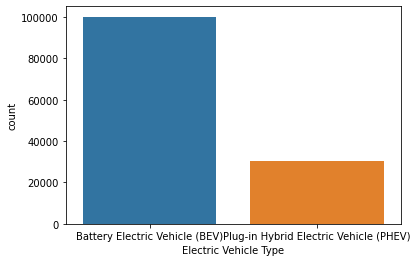

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Electric Vehicle Type',data=df)

Text(0.5, 1.0, 'City and Electric Vehicle type')

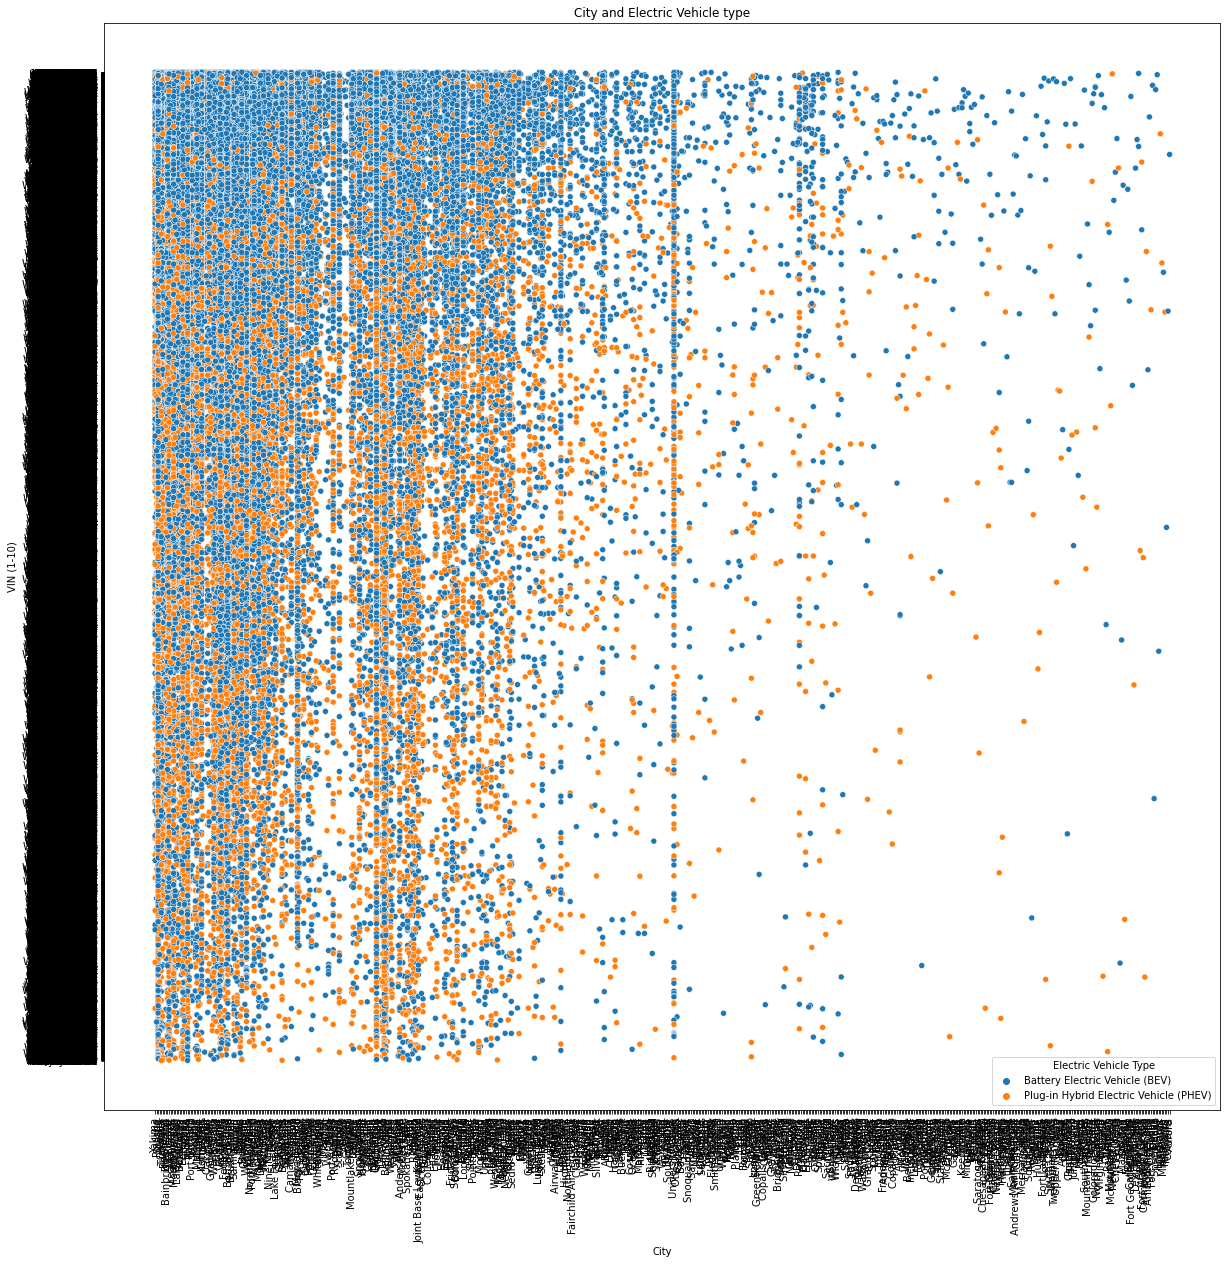

In [14]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='City',y='VIN (1-10)',hue='Electric Vehicle Type',data=df)
plt.xticks(rotation=90)
plt.title('City and Electric Vehicle type')